# Plot the results of the experiments

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from glob import glob 
from pathlib import Path 
from fastcore.xtras import load_pickle

import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from gptchem.settings import TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, TWO_COL_WIDTH_INCH
from gptchem.data import get_photoswitch_data
from gptchem.formatter import ClassificationFormatter
from gptchem.evaluator import evaluate_classification
from gptchem.baselines.photoswitch import train_test_photoswitch_baseline

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use(['science', 'nature'])

%matplotlib inline

In [61]:
data = get_photoswitch_data()
formatter = ClassificationFormatter(
        representation_column="SMILES",
        label_column="E isomer pi-pi* wavelength in nm",
        property_name="transition wavelength",
        num_classes=2,
        qcut=True,
    )

formatted = formatter(data)

dummy_results = []
for i in range(10): 
    for train_size in [10, 50, 200]:
        train, test = train_test_split(formatted, train_size=train_size, test_size=100, stratify=formatted["label"], random_state=i + 10)
        dummy = DummyClassifier(strategy="uniform")
        dummy.fit(train["representation"], train["label"])
        predictions = dummy.predict(test["representation"])
        metrics = evaluate_classification(test["label"], predictions)
        dummy_results.append({
            "train_size": train_size,
            **metrics,
        })


In [62]:
dummy_results = pd.DataFrame(dummy_results)

In [63]:
dummy_results

,train_size,accuracy,acc_macro,racc,kappa,confusion_matrix,f1_macro,f1_micro,frac_valid,all_y_true,all_y_pred,valid_indices,might_have_rounded_floats
0,10,0.50,0.50,0.5,0.00,"((0, {0: 26, 1: 24}), (1, {0: 26, 1: 24}))",0.499800,0.50,1.0,"[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
1,50,0.45,0.45,0.5,-0.10,"((0, {0: 21, 1: 29}), (1, {0: 26, 1: 24}))",0.449505,0.45,1.0,"[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
2,200,0.56,0.56,0.5,0.12,"((0, {0: 28, 1: 22}), (1, {0: 22, 1: 28}))",0.560000,0.56,1.0,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
3,10,0.55,0.55,0.5,0.10,"((0, {0: 28, 1: 22}), (1, {0: 23, 1: 27}))",0.549955,0.55,1.0,"[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
4,50,0.50,0.50,0.5,0.00,"((0, {0: 24, 1: 26}), (1, {0: 24, 1: 26}))",0.499800,0.50,1.0,"[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
5,200,0.57,0.57,0.5,0.14,"((0, {0: 27, 1: 23}), (1, {0: 20, 1: 30}))",0.569613,0.57,1.0,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ...","[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
6,10,0.57,0.57,0.5,0.14,"((0, {0: 26, 1: 24}), (1, {0: 19, 1: 31}))",0.568922,0.57,1.0,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...","[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
7,50,0.50,0.50,0.5,0.00,"((0, {0: 27, 1: 23}), (1, {0: 27, 1: 23}))",0.499199,0.50,1.0,"[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
8,200,0.46,0.46,0.5,-0.08,"((0, {0: 24, 1: 26}), (1, {0: 28, 1: 22}))",0.459784,0.46,1.0,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, ...","[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
9,10,0.51,0.51,0.5,0.02,"((0, {0: 24, 1: 26}), (1, {0: 23, 1: 27}))",0.509559,0.51,1.0,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, ...","[1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False


## Baselines

In [28]:
gpr_baselines = []

for i in range(10):
    for train_size in [10, 50, 100, 200]:
        res = train_test_photoswitch_baseline(
            data,
            train_size=train_size,
            test_size=100,
            formatter=formatter,
        )
        res['train_size'] = train_size
        gpr_baselines.append(res)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.mean_function.c     │ Parameter │ Identity         │         │ True        │ ()      │ float64 │ 0.47702 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 3.62097 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 0.25495 │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [29]:
gpr_res = pd.DataFrame(gpr_baselines)

In [38]:
gpr_baseline = gpr_res[['train_size', 'accuracy', 'f1_micro', 'f1_macro', 'kappa']].groupby('train_size').agg(('mean', 'std'))

## GPT Results

In [284]:
all_out = glob("out/**/*.pkl")

[autoreload of scipy.sparse.linalg._isolve.iterative failed: Traceback (most recent call last):
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/scipy/sparse/linalg/_isolve/iterative.py", line 150, in <module>
    def bicg(A, b, x0=None, tol=1e-

In [285]:
all_out = [load_pickle(p) for p in all_out]

In [286]:
extracted_res = []

for out in all_out: 
    res = {
        'base_model': out['base_model'],
        'train_size': out['train_size'],
        'test_size': out['test_size'],
        'n_epochs': out['n_epochs'],
        'learning_rate_multiplier': out['learning_rate_multiplier'],
        'frac_valid': out['frac_valid'],
        'accuracy': out['accuracy'],
        'f1_macro': out['f1_macro'],
        'f1_micro': out['f1_micro'],
        'kappa': out['kappa'],
    }

    extracted_res.append(res)

In [287]:
extracted_res = pd.DataFrame(extracted_res)

In [288]:
grouped = extracted_res.groupby(['base_model', 'train_size', 'n_epochs', 'learning_rate_multiplier']).agg(['mean', 'std']).sort_values(('f1_macro', 'mean'), ascending=False)

In [289]:
grouped

test_size       \
                                                             mean  std   
base_model train_size n_epochs learning_rate_multiplier                  
curie      200        4        0.20                         100.0  NaN   
                      8        0.20                         100.0  NaN   
                      4        0.05                         100.0  NaN   
babbage    200        8        0.10                         100.0  NaN   
curie      200        8        0.10                         100.0  NaN   
...                                                           ...  ...   
davinci    10         1        0.02                         100.0  0.0   
                               0.05                         100.0  0.0   
                      2        0.02                         100.0  0.0   
                               0.05                         100.0  0.0   
ada        10         1        0.02                         100.0  0.0   

                                                        frac_valid            \
                                                              mean       std   
base_model train_size n_epochs learning_rate_multiplier                        
curie      200        4        0.20                       1.000000       NaN   
                      8        0.20                       1.000000       NaN   
                      4        0.05                       1.000000       NaN   
babbage    200        8        0.10                       1.000000       NaN   
curie      200        8        0.10                       1.000000       NaN   
...                                                            ...       ...   
davinci    10         1        0.02                       0.000000  0.000000   
                               0.05                       0.000000  0.000000   
                      2        0.02                       0.000000  0.000000   
                               0.05                       0.016667  0.020817   
ada        10         1        0.02                       0.000000  0.000000   

                                                        accuracy       \
                                                            mean  std   
base_model train_size n_epochs learning_rate_multiplier                 
curie      200        4        0.20                         0.94  NaN   
                      8        0.20                         0.93  NaN   
                      4        0.05                         0.92  NaN   
babbage    200        8        0.10                         0.91  NaN   
curie      200        8        0.10                         0.91  NaN   
...                                                          ...  ...   
davinci    10         1        0.02                         0.00  0.0   
                               0.05                         0.00  0.0   
                      2        0.02                         0.00  0.0   
                               0.05                         0.00  0.0   
ada        10         1        0.02                         0.00  0.0   

                                                         f1_macro       \
                                                             mean  std   
base_model train_size n_epochs learning_rate_multiplier                  
curie      200        4        0.20                      0.940000  NaN   
                      8        0.20                      0.929993  NaN   
                      4        0.05                      0.920000  NaN   
babbage    200        8        0.10                      0.909991  NaN   
curie      200        8        0.10                      0.909991  NaN   
...                                                           ...  ...   
davinci    10         1        0.02                      0.000000  0.0   
                               0.05                      0.000000  0.0   
                      2        0.02                      0.00

In [290]:
grouped.loc[:, 10, : ,:]

test_size      frac_valid  \
                                                  mean  std       mean   
base_model n_epochs learning_rate_multiplier                             
curie      8        0.02                         100.0  0.0   1.000000   
                    0.05                         100.0  0.0   1.000000   
ada        8        0.02                         100.0  0.0   1.000000   
babbage    8        0.05                         100.0  0.0   1.000000   
davinci    8        0.02                         100.0  0.0   1.000000   
...                                                ...  ...        ...   
           1        0.02                         100.0  0.0   0.000000   
                    0.05                         100.0  0.0   0.000000   
           2        0.02                         100.0  0.0   0.000000   
                    0.05                         100.0  0.0   0.016667   
ada        1        0.02                         100.0  0.0   0.000000   

                                                        accuracy            \
                                                   std      mean       std   
base_model n_epochs learning_rate_multiplier                                 
curie      8        0.02                      0.000000  0.770000  0.056569   
                    0.05                      0.000000  0.705000  0.063640   
ada        8        0.02                      0.000000  0.702500  0.062383   
babbage    8        0.05                      0.000000  0.703333  0.066583   
davinci    8        0.02                      0.000000  0.685000  0.021213   
...                                                ...       ...       ...   
           1        0.02                      0.000000  0.000000  0.000000   
                    0.05                      0.000000  0.000000  0.000000   
           2        0.02                      0.000000  0.000000  0.000000   
                    0.05                      0.020817  0.000000  0.000000   
ada        1        0.02                      0.000000  0.000000  0.000000   

                                              f1_macro            f1_micro  \
                                                  mean       std      mean   
base_model n_epochs learning_rate_multiplier                                 
curie      8        0.02                      0.767879  0.058245  0.770000   
                    0.05                      0.703592  0.064745  0.705000   
ada        8        0.02                      0.695739  0.069733  0.702500   
babbage    8        0.05                      0.688974  0.083201  0.703333   
davinci    8        0.02                      0.684611  0.021083  0.685000   
...                                                ...       ...       ...   
           1        0.02                      0.000000  0.000000  0.000000   
                    0.05                      0.000000  0.000000  0.000000   
           2        0.02                      0.000000  0.000000  0.000000   
                    0.05                      0.000000  0.000000  0.000000   
ada        1        0.02                      0.000000  0.000000  0.000000   

                                                           kappa            
                                                   std      mean       std  
base_model n_epochs learning_rate_multiplier                                
curie      8        0.02                      0.056569  0.540000  0.113137  
                    0.05                      0.063640  0.410000  0.127279  
ada        8        0.02                      0.062383  0.405000  0.124766  
babbage    8        0.05                      0.066583  0.406667  0.133167  
davinci    8        0.02                      0.021213  0.370000  0.042426  
...                                                ...       ...       ...  
           1        0.02                      0.000000  0.000000  0.000000  
                    0.05                      0.0000

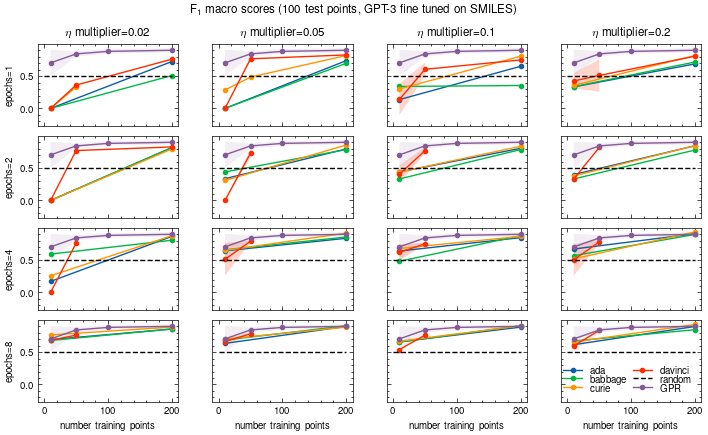

In [291]:
fig, ax = plt.subplots(4,4, figsize=(TWO_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all', sharey='all')

# plot learning curves (with errorband) for each combination of learning_rate_multiplier and n_epochs
# n_epochs in the rows, learning_rate_multiplier in the columns

num_epochs = [1, 2, 4, 8]
learning_rate_multipliers = [0.02, 0.05, 0.1, 0.2]
base_models = ['ada', 'babbage', 'curie', 'davinci']
for i, n_epochs in enumerate(num_epochs):
    for j, learning_rate_multiplier in enumerate(learning_rate_multipliers):
        for model in base_models:
            try:
                ax[i,j].plot(
                    grouped.loc[model, :, n_epochs, learning_rate_multiplier].index,
                    grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'mean')],
                    label=model,
                    marker='o'
                )

                # try to plot errorband
                try: 
                    std = grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'std')]
                    ax[i,j].fill_between(
                        grouped.loc[model, :, n_epochs, learning_rate_multiplier].index,
                        grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'mean')] - std,
                        grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'mean')] + std,
                        alpha=0.2,
                    )
                except Exception as e:
                    print(e)
            except Exception as e:
                print(e)
            
        ax[i,j].hlines(0.5, 0, 200, label="random", linestyle='--', color='k')
        # plot GPR baseline 
        ax[i,j].plot(gpr_baseline.index, gpr_baseline[('f1_macro', 'mean')], label="GPR", marker='o')
        ax[i,j].fill_between(
            gpr_baseline.index,
            gpr_baseline[('f1_macro', 'mean')] - gpr_baseline[('f1_macro', 'std')],
            gpr_baseline[('f1_macro', 'mean')] + gpr_baseline[('f1_macro', 'std')],
            alpha=.1
        )

# label the top row with teh lr_multipliers
for j, learning_rate_multiplier in enumerate(learning_rate_multipliers):
    ax[0,j].set_title(fr"$\eta$ multiplier={learning_rate_multiplier}")
    ax[-1, j].set_xlabel("number training points")

# label the first column with the n_epochs
for j, n_epochs in enumerate(num_epochs):
    ax[j,0].set_ylabel(f"epochs={n_epochs}")

ax[-1,-1].legend(ncols=2, labelspacing=0, columnspacing=.5, loc='lower right')

fig.suptitle("F$_1$ macro scores (100 test points, GPT-3 fine tuned on SMILES)")
fig.tight_layout()

fig.savefig('tuning_parameter_influence.pdf', bbox_inches='tight')